In [1]:
!pip install wordcloud==1.8.1


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: pip install --upgrade pip


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re

df = pd.read_csv('/work/datasets/Spotify 2010 - 2019 Top 100.csv')

In [3]:
df

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo
999,The London (feat. J. Cole & Travis Scott),Young Thug,atl hip hop,2019.0,2020‑06‑22,98.0,59.0,80.0,-7.0,13.0,18.0,200.0,2.0,15.0,75.0,2019.0,Solo
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.head(20)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
5,Magic (feat. Rivers Cuomo),B.o.B,atl hip hop,2010.0,2022‑02‑17,82.0,93.0,55.0,-4.0,35.0,79.0,196.0,1.0,34.0,71.0,2010.0,Solo
6,The Time (Dirty Bit),Black Eyed Peas,dance pop,2010.0,2022‑02‑17,128.0,81.0,82.0,-8.0,60.0,44.0,308.0,7.0,7.0,75.0,2010.0,Band/Group
7,Imma Be,Black Eyed Peas,dance pop,2009.0,2022‑02‑17,92.0,52.0,60.0,-7.0,31.0,41.0,258.0,18.0,37.0,71.0,2010.0,Band/Group
8,Talking to the Moon,Bruno Mars,dance pop,2010.0,2022‑02‑17,146.0,59.0,50.0,-5.0,11.0,8.0,218.0,51.0,3.0,87.0,2010.0,Solo
9,Just the Way You Are,Bruno Mars,dance pop,2010.0,2022‑02‑17,109.0,84.0,64.0,-5.0,6.0,42.0,221.0,1.0,4.0,86.0,2010.0,Solo


In [5]:
print(df.info())
total_nan_values = df.isna().sum()
print ("Total Number of NaN values:")
print(total_nan_values)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   title          1000 non-null   object 
 1   artist         1000 non-null   object 
 2   top genre      1000 non-null   object 
 3   year released  1000 non-null   float64
 4   added          1000 non-null   object 
 5   bpm            1000 non-null   float64
 6   nrgy           1000 non-null   float64
 7   dnce           1000 non-null   float64
 8   dB             1000 non-null   float64
 9   live           1000 non-null   float64
 10  val            1000 non-null   float64
 11  dur            1000 non-null   float64
 12  acous          1000 non-null   float64
 13  spch           1000 non-null   float64
 14  pop            1000 non-null   float64
 15  top year       1000 non-null   float64
 16  artist type    1000 non-null   object 
dtypes: float64(12), object(5)
memory usage: 133.3+ KB
No

In [6]:
df = df.dropna(axis=0)
df


,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SICKO MODE,Travis Scott,hip hop,2018.0,2020‑06‑22,155.0,73.0,83.0,-4.0,12.0,45.0,313.0,1.0,22.0,86.0,2019.0,Solo
996,EARFQUAKE,"Tyler, The Creator",hip hop,2019.0,2020‑06‑22,80.0,50.0,55.0,-9.0,80.0,41.0,190.0,23.0,7.0,85.0,2019.0,Solo
997,Boasty (feat. Idris Elba),Wiley,grime,2019.0,2020‑06‑22,103.0,77.0,89.0,-5.0,9.0,46.0,177.0,1.0,7.0,68.0,2019.0,Solo
998,Strike a Pose (feat. Aitch),Young T & Bugsey,afroswing,2019.0,2020‑08‑20,138.0,58.0,53.0,-6.0,10.0,59.0,214.0,1.0,10.0,67.0,2019.0,Duo


In [7]:
df.groupby('top genre')['top genre'].count().sort_values(ascending=False)

top genre
dance pop        361
pop               57
atl hip hop       39
art pop           37
hip hop           21
                ... 
idol               1
indie folk         1
dark clubbing      1
basshall           1
acoustic pop       1
Name: top genre, Length: 132, dtype: int64

In [8]:
genres_year = df[['top genre', 'top year']]
genres_year = genres_year.rename(columns={'top year':'top_year'})
def cont_gen(ds):
    years = range(2010, 2020)
    y_g = pd.DataFrame()
    for i in years:
        col = ds[ds.top_year == i]['top genre'].value_counts()
        col = col[:3]
        col.to_frame()
        col = col.rename(str(i))
        y_g = y_g.append(col)

    return y_g

genres_years = cont_gen(genres_year)
genres_years

,atl hip hop,barbadian pop,dance pop,contemporary country,pop,art pop,folk-pop,metropopolis,canadian contemporary r&b,alt z,canadian pop,canadian hip hop
2010,11.0,5.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,NaN,45.0,5.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,37.0,NaN,NaN,6.0,4.0,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,37.0,NaN,4.0,NaN,NaN,3.0,NaN,NaN,NaN,NaN
2014,NaN,NaN,39.0,NaN,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,38.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN
2016,NaN,NaN,48.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,4.0,NaN
2017,8.0,NaN,25.0,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018,7.0,NaN,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0
2019,NaN,NaN,22.0,NaN,11.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_682/3232020404.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


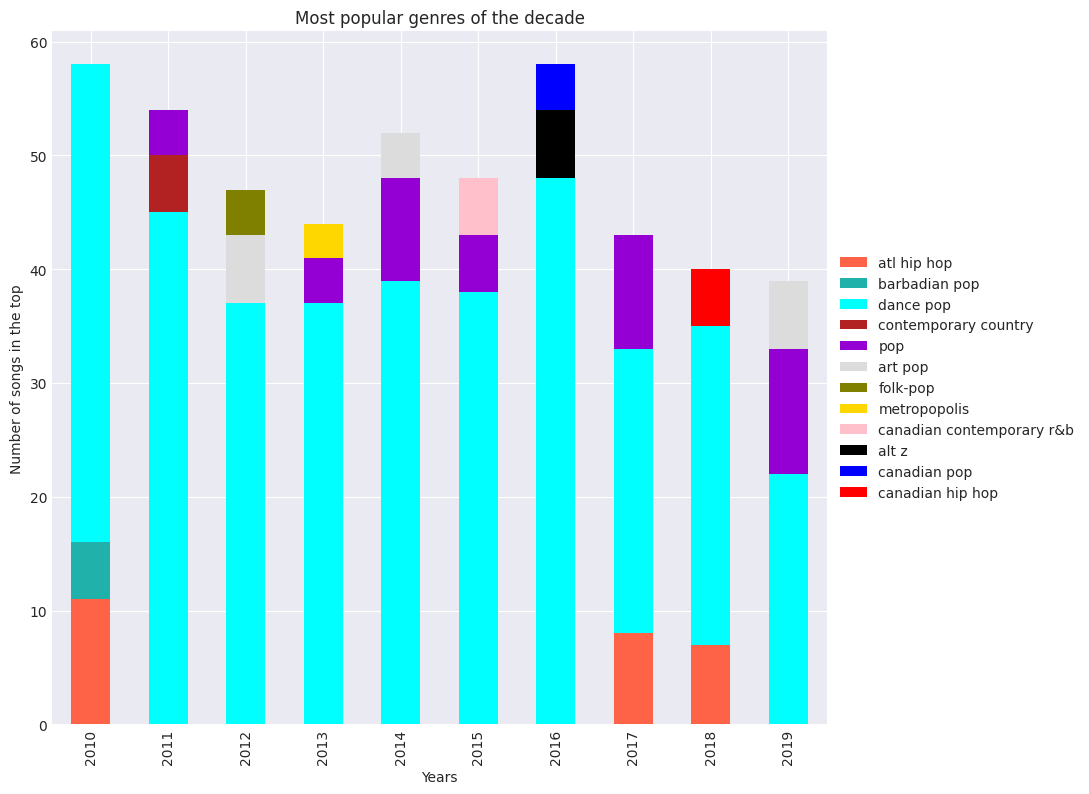

In [9]:
f1 = plt.figure()
colors = ['tomato','lightseagreen', 'Aqua', 'Firebrick', 'DarkViolet', 'Gainsboro', 'Olive', 'Gold', 'Pink', 'Black', 'Blue', 'Red']
plt.style.use('seaborn-darkgrid')
genres_years.plot(kind='bar', ax=f1.gca(), stacked=True ,figsize=(10,9), color=colors, ylabel='Number of songs in the top', xlabel='Years', title='Most popular genres of the decade')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


In [10]:
artist = df.query('`year released` < 2010')
artist.head(20)

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
7,Imma Be,Black Eyed Peas,dance pop,2009.0,2022‑02‑17,92.0,52.0,60.0,-7.0,31.0,41.0,258.0,18.0,37.0,71.0,2010.0,Band/Group
13,Memories (feat. Kid Cudi),David Guetta,big room,2009.0,2022‑02‑17,130.0,87.0,56.0,-6.0,25.0,50.0,210.0,0.0,34.0,74.0,2010.0,Solo
14,Gettin' Over You (feat. Fergie & LMFAO),David Guetta,big room,2009.0,2022‑02‑17,130.0,91.0,62.0,-5.0,8.0,45.0,188.0,18.0,8.0,55.0,2010.0,Solo
29,Replay,Iyaz,dance pop,2009.0,2022‑02‑17,91.0,75.0,71.0,-6.0,17.0,20.0,182.0,17.0,7.0,78.0,2010.0,Solo
33,Down,Jay Sean,dance pop,2009.0,2022‑02‑17,132.0,68.0,73.0,-4.0,8.0,73.0,213.0,1.0,3.0,83.0,2010.0,Solo
34,Do You Remember,Jay Sean,dance pop,2009.0,2022‑02‑17,126.0,67.0,85.0,-5.0,10.0,82.0,211.0,2.0,7.0,74.0,2010.0,Solo
35,Young Forever,JAY-Z,east coast hip hop,2009.0,2022‑02‑17,140.0,69.0,64.0,-3.0,21.0,10.0,254.0,42.0,7.0,71.0,2010.0,Solo
36,Heartbreak Warfare,John Mayer,neo mellow,2009.0,2022‑02‑17,97.0,55.0,62.0,-8.0,30.0,31.0,270.0,19.0,2.0,69.0,2010.0,Solo
37,Half of My Heart,John Mayer,neo mellow,2009.0,2022‑02‑17,115.0,59.0,68.0,-9.0,11.0,73.0,250.0,44.0,3.0,68.0,2010.0,Solo


In [11]:
artist.query('`top year` != 2010')

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
178,Good Life,OneRepublic,dance pop,2009.0,2020‑06‑16,95.0,69.0,63.0,-8.0,13.0,65.0,253.0,8.0,5.0,78.0,2011.0,Band/Group
982,Bohemian Rhapsody - Remastered 2011,Queen,classic rock,1975.0,2020‑06‑22,144.0,40.0,39.0,-10.0,24.0,23.0,354.0,29.0,5.0,77.0,2019.0,Band/Group


In [12]:
df.groupby('artist')['artist'].count().sort_values(ascending=False)

artist
Taylor Swift     21
Calvin Harris    18
Drake            18
Rihanna          14
Ariana Grande    14
                 ..
Milky Chance      1
Mr. Probz         1
Muse              1
Mustard           1
CeeLo Green       1
Name: artist, Length: 444, dtype: int64

In [13]:
artist_decade = df[['artist', 'top year']]
artist_decade = artist_decade.rename(columns={'top year':'top_year'})
def cont_art(ds):
    years = range(2010, 2020)
    a_d = pd.DataFrame()
    for i in years:
        col = ds[ds.top_year == i]['artist'].value_counts()
        col = col[:3]
        col.to_frame()
        col = col.rename(str(i))
        a_d = a_d.append(col)

    return a_d

artist_decades = cont_art(artist_decade)
artist_decades



,Kesha,Rihanna,Taylor Swift,Bruno Mars,Chris Brown,Calvin Harris,Katy Perry,Lana Del Rey,Macklemore & Ryan Lewis,Jason Derulo,...,Ariana Grande,Charlie Puth,The Chainsmokers,Imagine Dragons,Kendrick Lamar,Lorde,Drake,Marshmello,Post Malone,Billie Eilish
2010,4.0,5.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011,NaN,3.0,NaN,3.0,3.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012,NaN,NaN,NaN,NaN,NaN,3.0,2.0,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,NaN,NaN,3.0,NaN,NaN,4.0,NaN,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,3.0,NaN,NaN,3.0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,4.0,3.0,NaN,NaN,NaN,NaN
2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,3.0,NaN
2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0


/tmp/ipykernel_682/2224863985.py:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


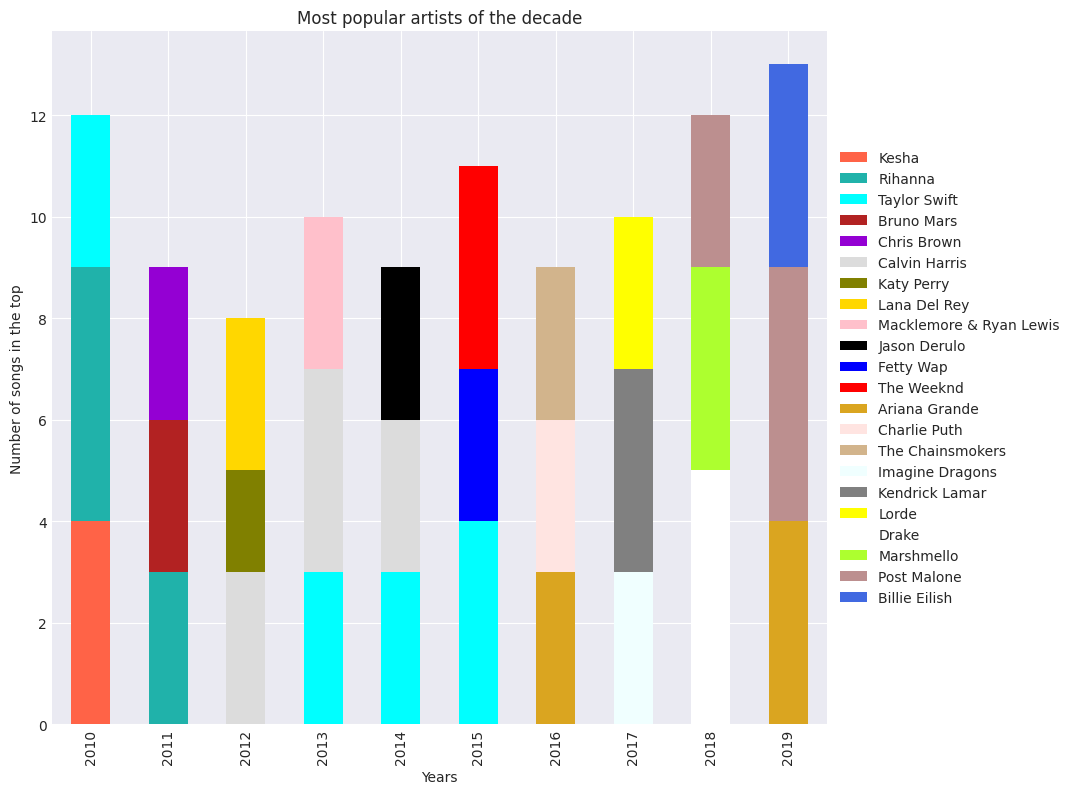

In [14]:
f2 = plt.figure()
colors = ['tomato','lightseagreen', 'Aqua', 'Firebrick', 'DarkViolet', 'Gainsboro', 'Olive', 'Gold', 'Pink', 'Black', 'Blue', 'Red', 'Goldenrod', 'mistyrose', 'tan', 'azure', 'gray', 'yellow', 'white', 'greenyellow', 'rosybrown', 'royalblue', 'bisque']
plt.style.use('seaborn-darkgrid')
artist_decades.plot(kind='bar', ax=f2.gca(), stacked=True ,figsize=(10,9), color=colors, title='Most popular artists of the decade', ylabel='Number of songs in the top', xlabel='Years')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

In [15]:
sad = df[['val', 'top year']]
sad = sad.rename(columns={'top year':'top_year'})
def cont_sad(ds):
    years = range(2010, 2020)
    s = {}
    for i in years:
        sa = sad[sad.top_year == i]
        pro = sa.mean()
        s[i] = pro[0]
    return s
sad1 = cont_sad(sad)
sad1 = pd.DataFrame(sad1.items(), columns=['year', 'prom_sad'])
sad1


,year,prom_sad
0,2010,56.74
1,2011,54.85
2,2012,53.29
3,2013,53.05
4,2014,50.95
5,2015,46.82
6,2016,46.92
7,2017,47.72
8,2018,47.56
9,2019,51.11


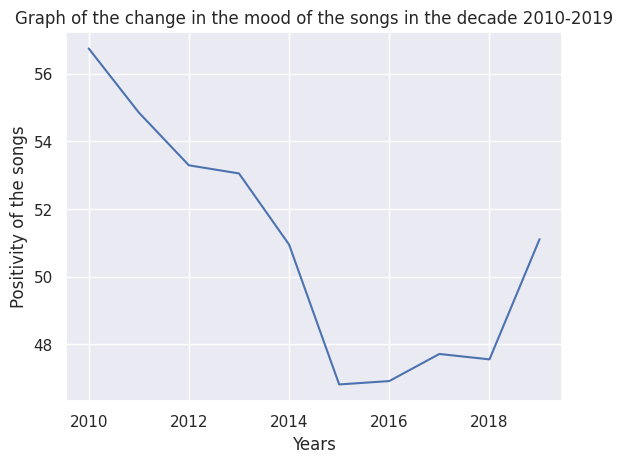

In [16]:
sns.set_theme(style="darkgrid")
f3 = sns.lineplot(data=sad1, x="year", y="prom_sad")
f3.set_title('Graph of the change in the mood of the songs in the decade 2010-2019')
f3.set_ylabel('Positivity of the songs')
f3.set_xlabel('Years')
plt.show()

In [17]:
nrgy = df[['nrgy', 'top year']]
nrgy = nrgy.rename(columns={'top year':'top_year'})
def cont_nrgy(ds):
    years = range(2010, 2020)
    s = {}
    for i in years:
        sa = nrgy[nrgy.top_year == i]
        pro = sa.mean()
        s[i] = pro[0]
    return s
energy = cont_nrgy(nrgy)
energy = pd.DataFrame(energy.items(), columns=['year', 'prom_energy'])
energy


,year,prom_energy
0,2010,76.65
1,2011,76.10
2,2012,74.07
3,2013,72.44
4,2014,71.03
5,2015,67.53
6,2016,65.80
7,2017,63.16
8,2018,65.45
9,2019,62.79


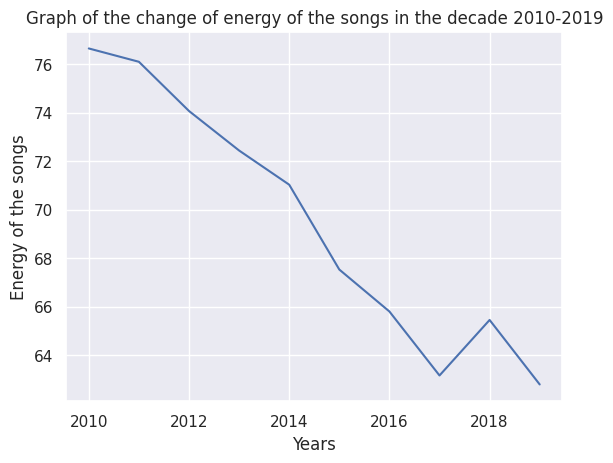

In [18]:
sns.set_theme(style="darkgrid")
f4 = sns.lineplot(data=energy, x="year", y="prom_energy")
f4.set_title('Graph of the change of energy of the songs in the decade 2010-2019')
f4.set_ylabel('Energy of the songs')
f4.set_xlabel('Years')
plt.show()

In [19]:
dnce = df[['dnce', 'top year']]
dnce = dnce.rename(columns={'top year':'top_year'})
def cont_dnce(ds):
    years = range(2010, 2020)
    s = {}
    for i in years:
        sa = dnce[dnce.top_year == i]
        pro = sa.mean()
        s[i] = pro[0]
    return s
dance = cont_dnce(dnce)
dance = pd.DataFrame(dance.items(), columns=['year', 'prom_dance'])
dance

,year,prom_dance
0,2010,65.29
1,2011,63.56
2,2012,64.01
3,2013,63.55
4,2014,65.88
5,2015,65.22
6,2016,64.53
7,2017,73.58
8,2018,70.80
9,2019,72.34


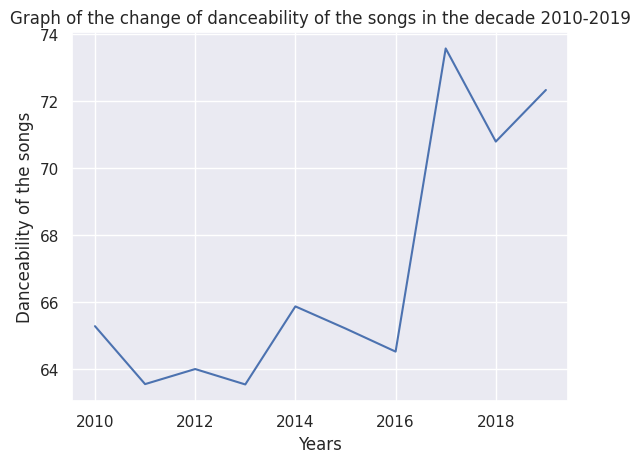

In [20]:
sns.set_theme(style="darkgrid")
f5 = sns.lineplot(data=dance, x="year", y="prom_dance")
f5.set_title('Graph of the change of danceability of the songs in the decade 2010-2019')
f5.set_ylabel('Danceability of the songs')
f5.set_xlabel('Years')
plt.show()

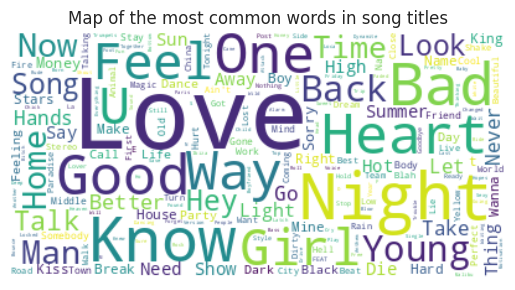

In [21]:
text = " ".join(title for title in df.title)
text = "".join(re.split("\(|\)|\[|\]", text)[::2])
text = text.replace('Edit ', '')
text = text.replace('Radio ', '')
text = text.replace('Remix', '')

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)

plt.imshow(word_cloud, interpolation='bilinear')
plt.title('Map of the most common words in song titles')
plt.axis("off")
plt.show()

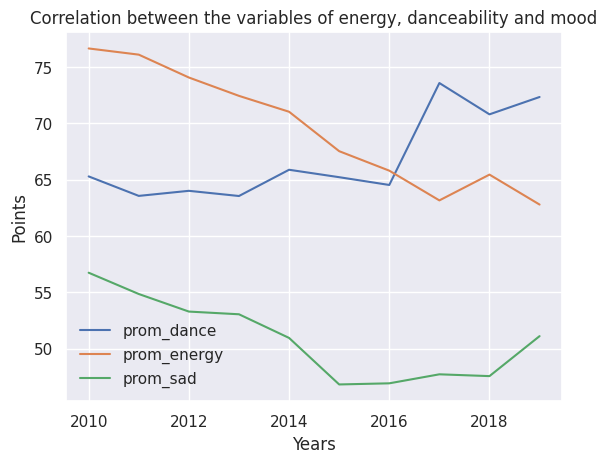

In [22]:
sns.set_theme(style="darkgrid")
f5 = sns.lineplot(data=dance, x="year", y="prom_dance", label='prom_dance')
f4 = sns.lineplot(data=energy, x="year", y="prom_energy", label='prom_energy')
f3 = sns.lineplot(data=sad1, x="year", y="prom_sad", label='prom_sad')
f5.set_xlabel('Years')
f5.set_ylabel('Points')
f5.legend()
f5.set(title='Correlation between the variables of energy, danceability and mood')
plt.show()

<AxesSubplot: >

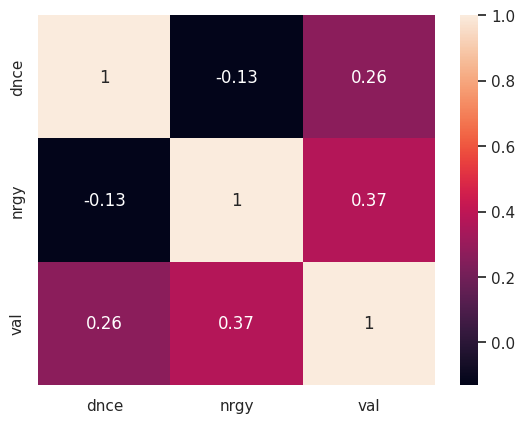

In [23]:
expr = df[['dnce', 'nrgy', 'val']]
sns.heatmap(expr.corr(), annot = True)

In [24]:
df1 = df.rename(columns={'top year':'top_year'})


In [25]:
df1 = df1[df1.dnce > 66]
df1 = df1.reset_index()

In [26]:
df1['dnce'].sort_values(ascending=False)

228    96.0
449    96.0
496    95.0
348    94.0
380    94.0
       ... 
331    67.0
328    67.0
321    67.0
320    67.0
372    67.0
Name: dnce, Length: 549, dtype: float64

In [27]:
df1.iloc[[228, 449, 496, 348, 380]]

,index,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top_year,artist type
228,461,Anaconda,Nicki Minaj,dance pop,2014.0,2020‑06‑10,130.0,61.0,96.0,-6.0,21.0,65.0,260.0,7.0,18.0,70.0,2014.0,Solo
449,856,Yes Indeed,Lil Baby,atl hip hop,2018.0,2020‑06‑22,120.0,35.0,96.0,-9.0,11.0,56.0,142.0,4.0,53.0,84.0,2018.0,Solo
496,923,Money,Cardi B,dance pop,2018.0,2020‑06‑22,130.0,59.0,95.0,-7.0,11.0,22.0,184.0,1.0,29.0,78.0,2019.0,Solo
348,705,Caroline,Aminé,hip hop,2017.0,2021‑01‑28,120.0,34.0,94.0,-10.0,26.0,71.0,210.0,17.0,51.0,80.0,2017.0,Solo
380,750,Gucci Gang,Lil Pump,emo rap,2017.0,2021‑01‑28,120.0,52.0,94.0,-7.0,12.0,70.0,124.0,24.0,6.0,69.0,2017.0,Solo
